In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [5]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    discharged = df.recovered+df.deaths
    hospitalized = df.confirmed - discharged
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(discharged,dashes=[2,2,6, 2],c='y',label='discharged')
    plt.plot(hospitalized,dashes=[2,2,6, 2],c='b',label='hospitalized')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 3))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('discharged: ',discharged.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/discharged.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('discharged')
    plt.ylabel('deaths')
    plt.show()


In [6]:
# for c in json.columns:
#     print(c)

      date  confirmed  deaths  recovered
 2020-4-18       2733      47       1787
new  confirmed
      33.0


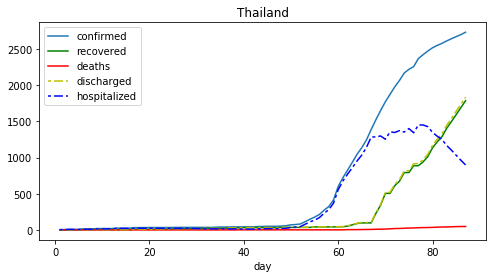

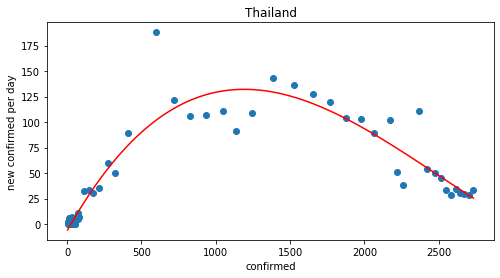

discharged:  1834
deaths:  47
%:  2.5627044711014175


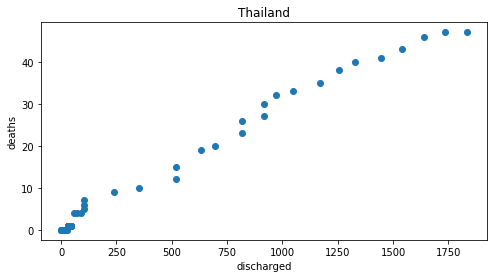

      date  confirmed  deaths  recovered
 2020-4-18       5305      88       3102
new  confirmed
      54.0


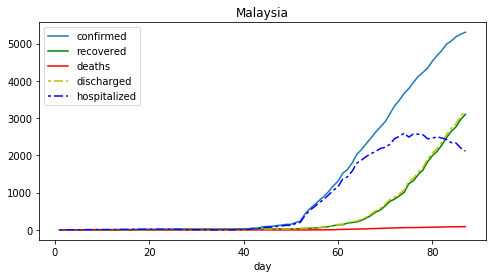

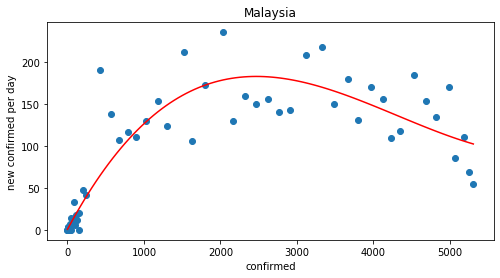

discharged:  3190
deaths:  88
%:  2.7586206896551726


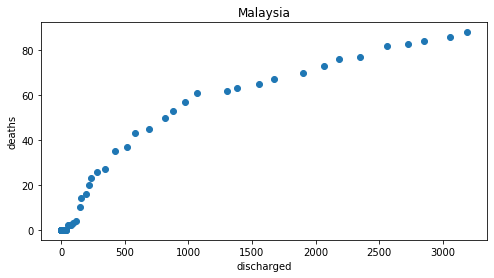

      date  confirmed  deaths  recovered
 2020-4-18       5992      11        740
new  confirmed
     942.0


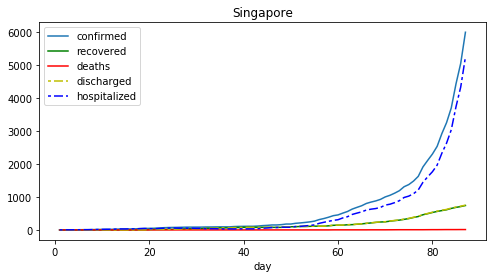

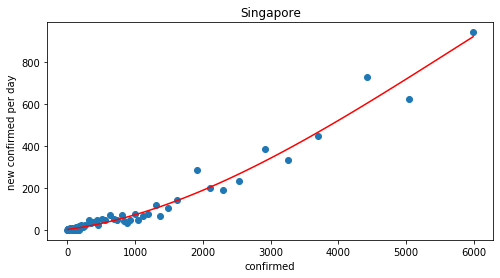

discharged:  751
deaths:  11
%:  1.4647137150466045


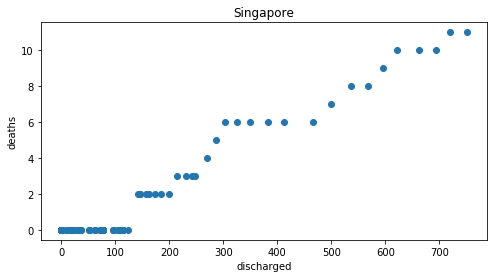

      date  confirmed  deaths  recovered
 2020-4-18       6248     535        631
new  confirmed
     325.0


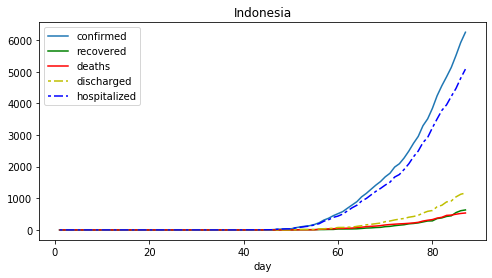

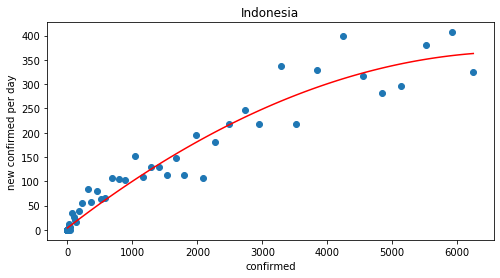

discharged:  1166
deaths:  535
%:  45.88336192109777


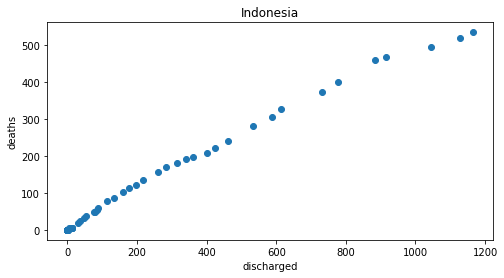

      date  confirmed  deaths  recovered
 2020-4-18     732197   38664      64840
new  confirmed
   32491.0


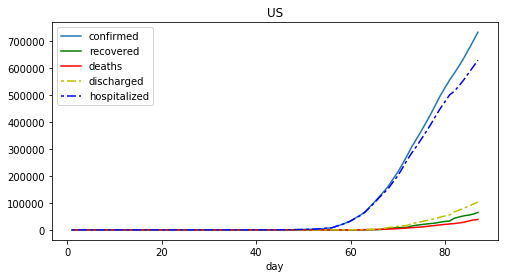

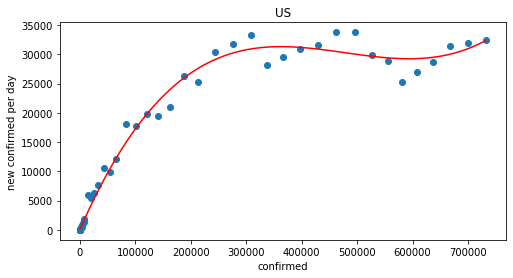

discharged:  103504
deaths:  38664
%:  37.35507806461586


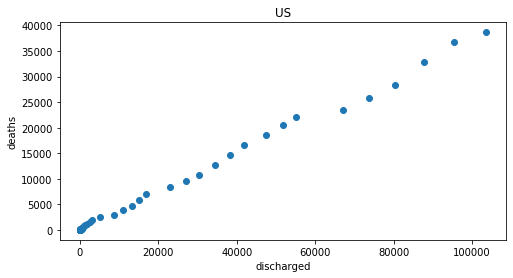

      date  confirmed  deaths  recovered
 2020-4-18      83787    4636      77614
new  confirmed
      27.0


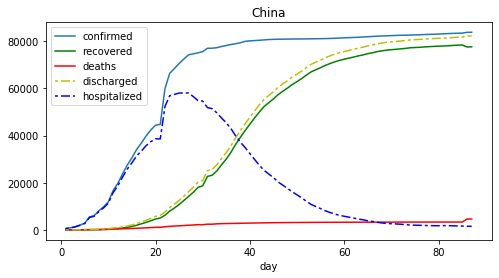

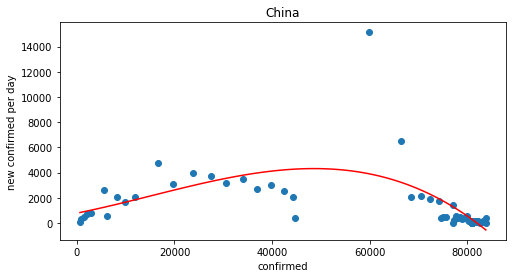

discharged:  82250
deaths:  4636
%:  5.636474164133739


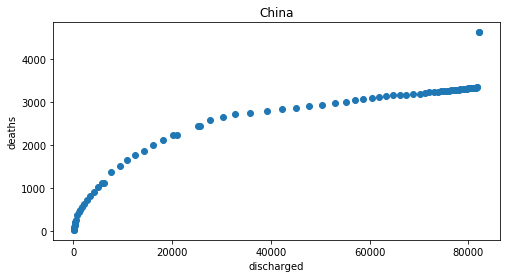

      date  confirmed  deaths  recovered
 2020-4-18      10653     232       7937
new  confirmed
      18.0


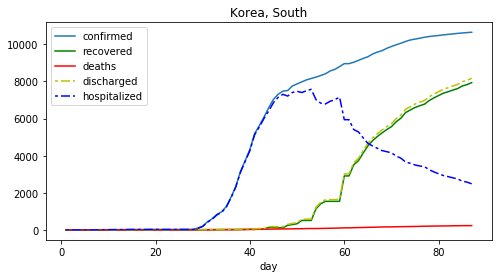

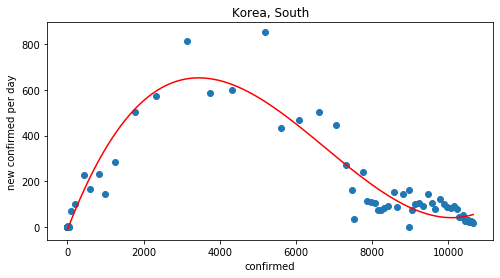

discharged:  8169
deaths:  232
%:  2.8400048965601665


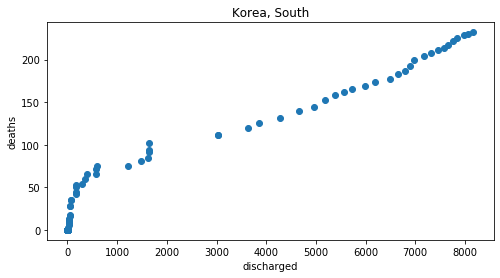

      date  confirmed  deaths  recovered
 2020-4-18     175925   23227      44927
new  confirmed
    3491.0


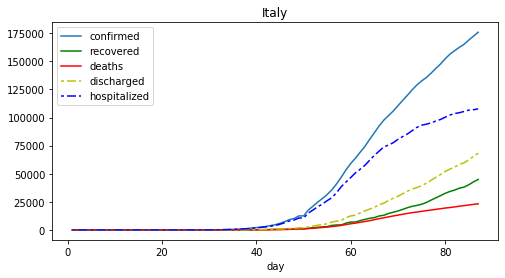

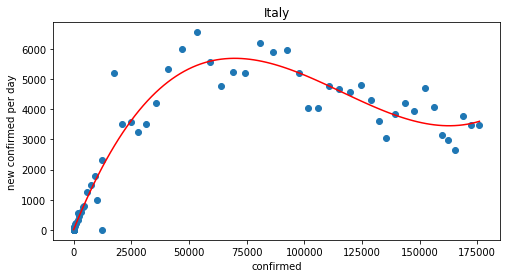

discharged:  68154
deaths:  23227
%:  34.08017137658831


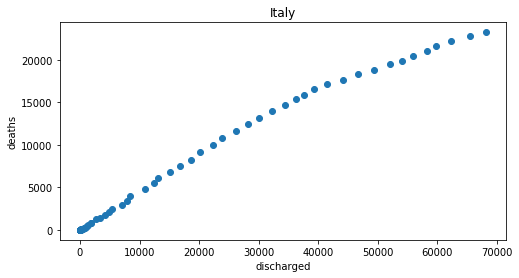

      date  confirmed  deaths  recovered
 2020-4-18     191726   20043      74797
new  confirmed
     887.0


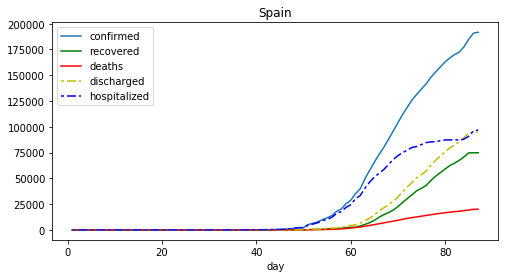

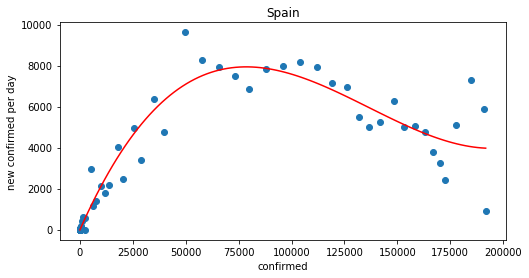

discharged:  94840
deaths:  20043
%:  21.133487979755376


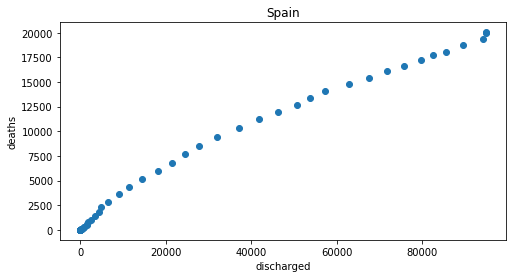

In [7]:
for c in ['Thailand','Malaysia','Singapore','Indonesia','US','China','Korea, South','Italy','Spain']:
    plot_country(c)
